# 蒙特卡洛检验

随机模拟可以辅助说明新模型或新方法的有效性， 尤其是在很难获得关于有效性的理论结果的情况下让我们也能说明自己的新方法的优点。

比如，为了掌握统计量的抽样分布经常需要依靠随机模拟。 在独立正态样本情况下， 我们已经有样本均值和样本方差的分布， 但是对其它分布的样本， 我们一般只能得到统计量的大样本性质， 在中小样本情况下很难得到的抽样分布理论结果， 随机模拟可以解决这样的问题。 在抽取的很多批样本后， 得到很多个统计量样本值， 从这些样本值可以估计的抽样分布， 并研究样本量多大时的抽样分布与大样本极限分布相符， 计算估计的均方误差，等等。


### 1.计算标准差

$\theta=\,E[X_{1}-X_{2}]$

In [3]:
m = 1000
g = numeric(m) # 产生1000个零
for (i in 1:m){
    x = rnorm(2)
    g[i] = abs(x[1]-x[2])
}
est =  mean(g)
est

[1] 1.110856

In [8]:
sqrt(var(g)/m)

[1] 0.0264077

In [10]:
sqrt(sum((g-mean(g))^2))/m

[1] 0.02639449

m很大时，以上两种方法的计算结果一样。

### 2.计算MSE

${{\theta=E[{\overline{{X}}}]=E[{\overline{{X}}}_{[-1]}]=0}}$ 

这个参数是一个修正均值，我们想计算这个参数的mse

In [11]:
n = 20
m = 1000
tmean = numeric(m)
for ( i in 1:m){
    x = sort(rnorm(n))
    tmean[i] = sum(x[2:(n-1)])/(n-2)
}
mse = mean(tmean^2)
mse

[1] 0.05401532

中位数实际上是一个修正的平均值；它删除了除一到两个观察结果之外的所有观察结果。

In [14]:
# 按照中位数替代修正均值
n = 20
m = 1000
tmean = numeric(m)
for (i in 1:m){
    x = sort(rnorm(n))
    tmean[i] = median(x) # 这一步
}
mse = mean(tmean^2)
mse

[1] 0.0744276

### 3.计算置信水平1-$a$

计算20个样本的${\mathrm{Norm}}\mathrm{a}{\mathrm{l}}(0,\sigma^{2}=4)$分布的95%置信下限

In [2]:
# 简单思想
n = 20
alpha = 0.05
x = rnorm(n,mean = 0,sd = 2)
UCL = (n-1)*var(x)/qchisq(alpha,df = n-1)
UCL

[1] 5.648964

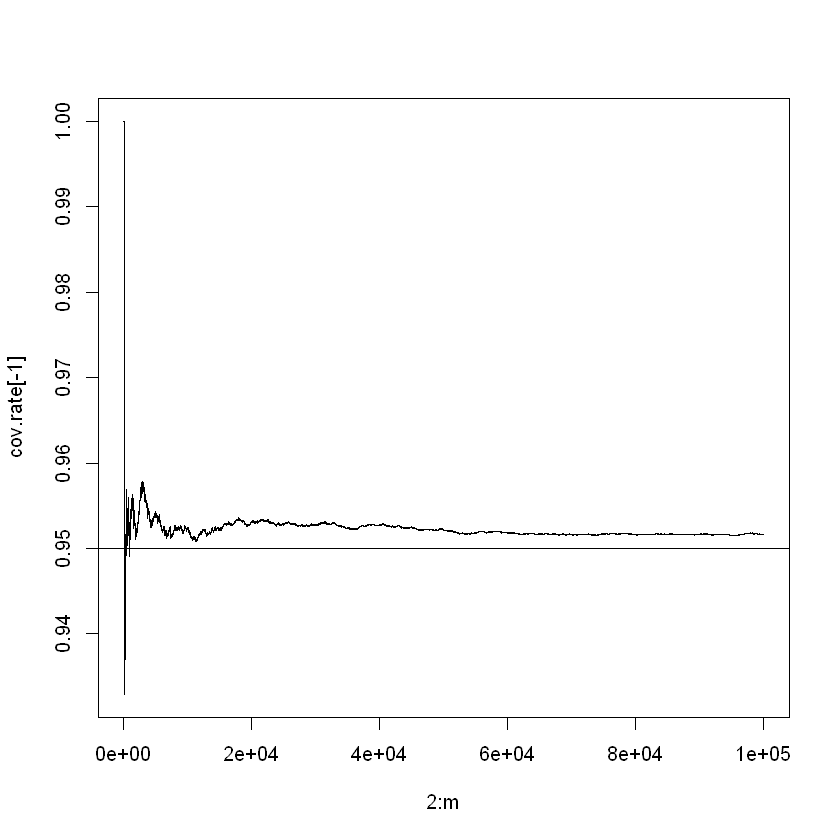

In [4]:
# 重复100000次
n = 20
alpha = 0.05
m = 100000
ucls = numeric(m)
for ( i in 1:m){
    x = rnorm(n,mean = 0,sd = 2)
    ucls[i] = (n-1)*var(x)/qchisq(alpha,df = n-1)
}
ind = (ucls>4)
cov.rate = cumsum(ind)/1:m
plot(2:m,cov.rate[-1],type = 'l')
abline(h = 0.95)

In [7]:
# 使用replicate函数
n = 20
alpha = 0.05
UCL = replicate(1000,expr = {
    x = rnorm(n,mean = 0,sd = 2)
    (n-1)*var(x)/qchisq(alpha,df = n-1)
})

mean(UCL>4)
#所以经验置信区间估计为94.9%

[1] 0.949

### 4.假设检验

$H_{0}:\mu=500\,\,H_{1}:\mu\gt 500$

求临界值和估计值的标准误

In [1]:
n = 20
alpha = 0.05
mu0 = 500
sigma = 100
m = 10000 
p = numeric(m)
for (j in 1:m){
    x = rnorm(n,mu0,sigma)
    ttest = t.test(x,alternative = 'greater',mu = mu0) # greater，右边检验，备择假设中u更大
    p[j] = ttest$p.value
}
p.hat = mean(p<alpha)
se.hat = sqrt(p.hat*(1-p.hat)/m)
print(c(p.hat,se.hat))


[1] 0.052400000 0.002228323


In [3]:
sd(p<alpha)

[1] 0.2228435

计算偏度统计量

In [14]:
n = c(10,20,30,50,100,500) # 样本量
cv = qnorm(0.975,0,sqrt(6/n))
# 对于无限样本量情况，cv = qnorm(0.975,0,sqrt(6*(n-2)/((n+1)*(n+3))))

sk = function(x){
    xbar = mean(x)
    m3 = mean((x-xbar)^3)
    m2 = mean((x-xbar)^2)
    return(m3/m2^1.5)
}

p.reject = numeric(length(n))
m = 10000
for (i in 1:length(n)){
    sktests = numeric(m)
    for (j in 1:m){
        x = rnorm(n[i])
        sktests[j] = as.integer(abs(sk(x))>=cv[i])
    }
    p.reject[i] = mean(sktests) # 拒绝的概率
}

p.reject


[1] 0.0130 0.0298 0.0345 0.0400 0.0459 0.0482

### 5.检验的功效

$H_{0}:\mu=500\,\,H_{1}:\mu\gt 500$

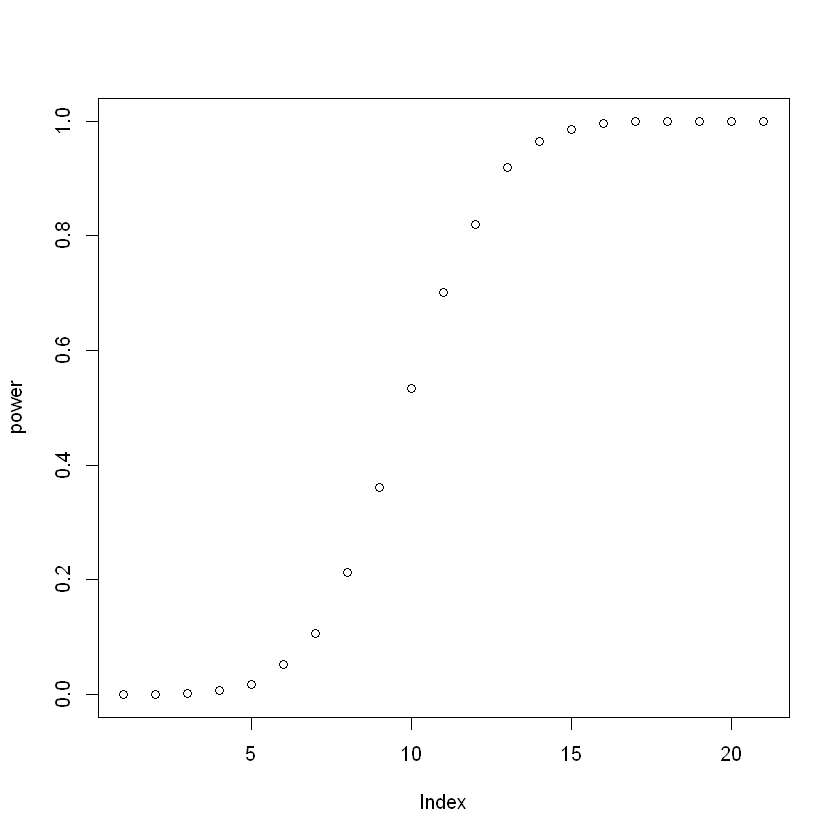

In [22]:
n = 20
alpha = 0.05
mu0 = 500
sigma = 100
mu = c(seq(450,650,10)) # 比较三个不同的检验方案
M = length(mu)
power  = numeric(M)
for (i in 1:M){
    mu1 = mu[i]
    pvalues = replicate(m,expr = {
        x = rnorm(n,mean = mu1,sd = sigma)
        ttest = t.test(x,alternative = 'greater',mu = mu0) # greater，右边检验，备择假设中u更大
        ttest$p.value
    })
    power[i] = mean(pvalues <= 0.05)
}

print(power)
plot(power)